In [9]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.signal import convolve
import scipy
from joblib import Parallel, delayed
import time
from scipy import sparse
from tqdm import tqdm, tqdm_notebook

%run ../initMethods_sparse.py
%run ../makeGif.py
%run ../methods_parallel_sparse.py

In [10]:
params = { #parameters relevant for the equations
    "Nh":               1,
    "N0":               1,
    "M":                1, #Also L, total number of spacers
    "r":              1000, #cross-reactivity kernel
}
sim_params = { #parameters relevant for the simulation (including Inital Valuess)
    "xdomain":                    100,
    "dx":                           1,
    "conv_size":                   10,
    "num_threads":                  4,
}

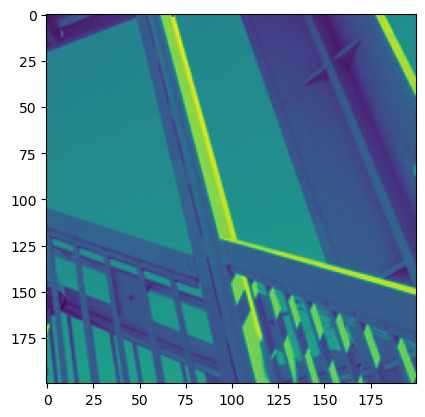

In [11]:
input_ascent = scipy.datasets.ascent()[200:400, 200:400]
filter_kernel = init_full_kernel(params, sim_params)
filter_quarter_kernel = init_quarter_kernel(params, sim_params)
plt.imshow(input_ascent)

Text(0.5, 1.0, 'Scipy Single Thread Convolution')

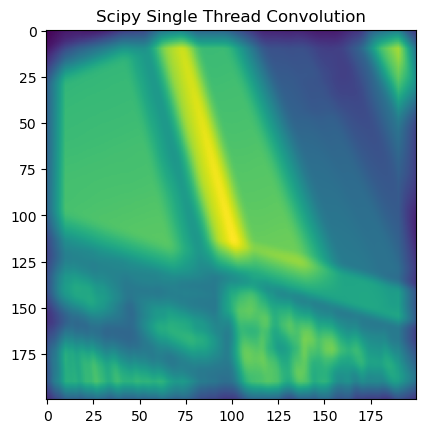

In [12]:
expected_result = scipy.signal.convolve2d(input_ascent, filter_kernel, mode = "same")
plt.imshow(expected_result)
plt.title("Scipy Single Thread Convolution")

In [13]:
nh = input_ascent
n = expected_result
kernel_quarter = filter_quarter_kernel
conv_size = sim_params["conv_size"]
r = params["r"]

In [144]:
ind_nh = nh.nonzero() # there is 262106 nonzero elements in nh
ind_n = n.nonzero() # There is 262144 nonzero elemets in n
ind_nh = zip(*ind_nh)
ind_n = zip(*ind_n)
i = 0
j = 0
k = 0
for x in ind_nh:
    for x_n in ind_n:
        j+=1
    i+=1
print(i, j, k)

39998 40000 0


In [145]:
ind_nh = zip(range(10), range(10))
ind_n = zip(range(20), range(20))
i = 0
j = 0
for x in ind_nh:
    for x_n in ind_n:
        j+=1
print("zip outside: ", j)

for x in zip(range(10), range(10)):
    for x_n in zip(range(20), range(20)):
        i+=1
print("zip inside: ", i)

zip outside:  20
zip inside:  200


In [42]:
elementwise_result = coverage_sparse_parrallel(input_ascent, expected_result, 
        filter_quarter_kernel, params, sim_params)
# plt.imshow(elementwise_result.todense())

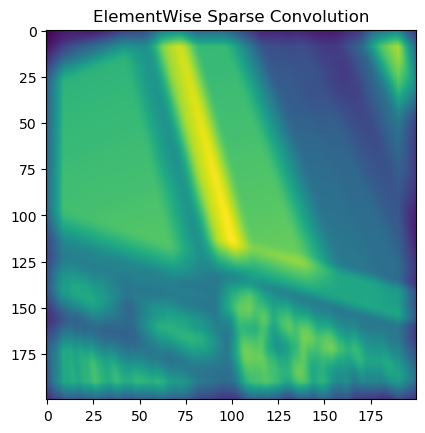

In [44]:
plt.imshow(elementwise_result.todense())
plt.title("ElementWise Sparse Convolution")
plt.show()

In [39]:
%run ../methods_parallel_sparse.py

Text(0.5, 1.0, 'Parrallel Convolution')

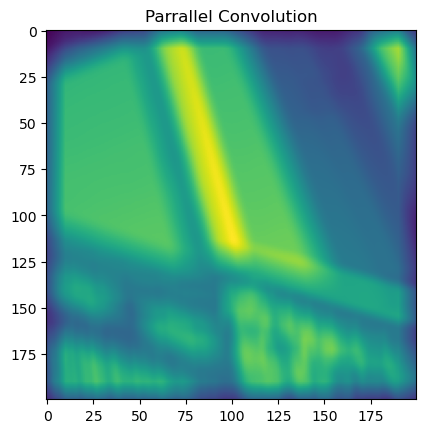

In [40]:
split_result = coverage_parrallel_convolution(input_ascent, filter_kernel, params, sim_params)
plt.imshow(split_result)
plt.title("Parrallel Convolution")